1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。

In [19]:
import json  
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file)  
nodes = data['nodes']  
edges = data['edges']    
network = {}  
for node in nodes:  
    name, influence_score = node  
    network[name] = {}  
for edge in edges:  
    user1, user2, weight = edge  
    if user1 in network and user2 in network:  
        network[user1][user2] = weight 
        network[user2][user1] = weight
for user, neighbors in network.items():  
    print(f"{user}: {neighbors}")  

Yanyan-Wang: {'Aarebecca': 25.3, 'pomelo-nwu': 25.09, 'yangzy0603': 11.85, 'tyn1998': 9.62, 'yvonneyx': 7.39, 'lidongze0629': 7.25, 'RackweLLizm': 4.5, 'yikenie': 4.25, 'yubo0923': 3.61, 'Maple0817': 3.11, 'wj23027': 2.34, 'frank-zsy': 2.1, 'andyhuang18': 1.14, 'bifenglin': 0.86}
Aarebecca: {'Yanyan-Wang': 25.3, 'pomelo-nwu': 24.84, 'yangzy0603': 11.92, 'yvonneyx': 7.73, 'lidongze0629': 6.58, 'tyn1998': 6.4, 'RackweLLizm': 4.84, 'yikenie': 4.55, 'yubo0923': 3.82, 'Maple0817': 3.27, 'frank-zsy': 0.97}
pomelo-nwu: {'Yanyan-Wang': 25.09, 'Aarebecca': 24.84, 'yangzy0603': 13.85, 'tyn1998': 12.48, 'lidongze0629': 8.1, 'yvonneyx': 7.63, 'RackweLLizm': 4.97, 'yikenie': 4.66, 'bifenglin': 4.11, 'frank-zsy': 3.96, 'yubo0923': 3.9, 'wj23027': 3.86, 'andyhuang18': 3.56, 'Maple0817': 3.32, 'will-ww': 3.27, 'zhicheng-ning': 2.52, 'PureNatural': 2.36, 'xiaoya-yaya': 2.24, 'xgdyp': 2.1, 'longyanz': 2.1, 'Zzzzzhuzhiwei': 1.5, 'birdflyi': 1.33, 'lhbvvvvv': 1.09, 'zhaosj975': 1}
tyn1998: {'andyhuang18':

b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出

In [7]:
import json  
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file)  
edges = data['edges']  
direct_friends = {}  
for edge in edges:  
    user1, user2, _ = edge   
    if user1 not in direct_friends:  
        direct_friends[user1] = []    
    direct_friends[user1].append(user2)    
    if user2 not in direct_friends:  
        direct_friends[user2] = []  
    direct_friends[user2].append(user1)  
for user, friends in direct_friends.items():  
    print(f"{user}的直接朋友有: {sorted(friends)}")  

Yanyan-Wang的直接朋友有: ['Aarebecca', 'Maple0817', 'RackweLLizm', 'andyhuang18', 'bifenglin', 'frank-zsy', 'lidongze0629', 'pomelo-nwu', 'tyn1998', 'wj23027', 'yangzy0603', 'yikenie', 'yubo0923', 'yvonneyx']
Aarebecca的直接朋友有: ['Maple0817', 'RackweLLizm', 'Yanyan-Wang', 'frank-zsy', 'lidongze0629', 'pomelo-nwu', 'tyn1998', 'yangzy0603', 'yikenie', 'yubo0923', 'yvonneyx']
pomelo-nwu的直接朋友有: ['Aarebecca', 'Maple0817', 'PureNatural', 'RackweLLizm', 'Yanyan-Wang', 'Zzzzzhuzhiwei', 'andyhuang18', 'bifenglin', 'birdflyi', 'frank-zsy', 'lhbvvvvv', 'lidongze0629', 'longyanz', 'tyn1998', 'will-ww', 'wj23027', 'xgdyp', 'xiaoya-yaya', 'yangzy0603', 'yikenie', 'yubo0923', 'yvonneyx', 'zhaosj975', 'zhicheng-ning']
andyhuang18的直接朋友有: ['PureNatural', 'Vlad116', 'Yanyan-Wang', 'Zzzzzhuzhiwei', 'bifenglin', 'birdflyi', 'frank-zsy', 'kunal8411', 'lhbvvvvv', 'longyanz', 'pomelo-nwu', 'pranavshuklaa', 'stealth-bombeer', 'stevending1st', 'tyn1998', 'will-ww', 'wj23027', 'wxharry', 'xgdyp', 'xiaoya-yaya', 'yangzy06

2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。

In [49]:
import json  
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file)  
edges = data['edges']  
direct_friends = {}  
degrees = {}  
for edge in edges:  
    user1, user2, _ = edge  
    if user1 not in direct_friends:  
        direct_friends[user1] = []  
        degrees[user1] = 0  
    direct_friends[user1].append(user2)  
    degrees[user1] += 1  
    if user2 not in direct_friends:  
        direct_friends[user2] = []  
        degrees[user2] = 0  
    direct_friends[user2].append(user1)  
    degrees[user2] += 1  
sorted_degrees = sorted(degrees.items(), key=lambda item: item[1], reverse=True)  
top_5_users = sorted_degrees[:5]  
for user, degree in top_5_users:  
    print(f"{user}的朋友数量: {degree}")

tyn1998的朋友数量: 30
frank-zsy的朋友数量: 30
pomelo-nwu的朋友数量: 24
andyhuang18的朋友数量: 23
wj23027的朋友数量: 23


b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。

In [47]:
import json  
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file) 
nodes = data['nodes'] 
network={}
for node in nodes:  
    name, influence_score = node  
    network[name] = influence_score   
sorted_users = sorted(network.items(), key=lambda item: item[1], reverse=True)[:5] 
# 输出影响力最高的前5个用户及其分数  
for user, score in sorted_users:  
    print(f"{user}的影响力分数: {score}")

Yanyan-Wang的影响力分数: 50.95
Aarebecca的影响力分数: 23.82
pomelo-nwu的影响力分数: 22.36
tyn1998的影响力分数: 16.64
frank-zsy的影响力分数: 15.8


c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [43]:
import json  
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file)  
nodes = data['nodes']  
edges = data['edges']  
influence_scores = {node[0]: node[1] for node in nodes}  
direct_friends_count = {}  
for edge in edges:  
    user1, user2, _ = edge  
    if user1 not in direct_friends_count:  
        direct_friends_count[user1] = 0  
    direct_friends_count[user1] += 1  
    if user2 not in direct_friends_count:  
        direct_friends_count[user2] = 0  
    direct_friends_count[user2] += 1  
combined_influence = {}  
for user in influence_scores:  
    if user in direct_friends_count:  
        score = influence_scores[user] * 0.5 + direct_friends_count[user] * 0.5  
        combined_influence[user] = score  
sorted_users = sorted(combined_influence.items(), key=lambda item: item[1], reverse=True)[:5]  
for user, score in sorted_users:  
    print(f"对社交网络有影响力的用户: {user}, 其综合影响力得分为: {score}")
print(f"对社交网络最有影响力的用户是: {most_influential_user}, 其综合影响力得分为: {highest_score}")

对社交网络有影响力的用户: Yanyan-Wang, 其综合影响力得分为: 32.475
对社交网络有影响力的用户: tyn1998, 其综合影响力得分为: 23.32
对社交网络有影响力的用户: pomelo-nwu, 其综合影响力得分为: 23.18
对社交网络有影响力的用户: frank-zsy, 其综合影响力得分为: 22.9
对社交网络有影响力的用户: Aarebecca, 其综合影响力得分为: 17.41
对社交网络最有影响力的用户是: Yanyan-Wang, 其综合影响力得分为: 32.475


3.推荐新朋友
a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。

In [41]:
import json  
from collections import defaultdict, Counter 
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file)  
nodes = data['nodes']  
edges = data['edges']  
social_network={}  
for node in nodes:  
    name, influence=node  
    social_network[name]={}  
for edge in edges:  
    name1, name2, weight=edge  
    if name1 in social_network and name2 in social_network:  
        social_network[name1][name2]=weight  
        social_network[name2][name1]=weight 
friends_list={}  
for name, connections in social_network.items():  
    friends_list[name]=list(connections.keys())
yanyan_wang_friends=friends_list["Yanyan-Wang"]
potential_friends=set()  
for friend in yanyan_wang_friends:  
    for friend_of_friend in friends_list[friend]:  
        if friend_of_friend not in yanyan_wang_friends and friend_of_friend != "Yanyan-Wang":  
            potential_friends.add(friend_of_friend)
common_friends_count={}  
for potential_friend in potential_friends:  
    common_friends=set(friends_list["Yanyan-Wang"])&set(friends_list[potential_friend])  
    common_friends_count[potential_friend]=len(common_friends)
sorted_potential_friends=sorted(common_friends_count.items(), key=lambda x: x[1], reverse=True)  
maxn=0
recommended_friends=[]
for name, count in sorted_potential_friends:
    if count>maxn:
        maxn=count
for name, count in sorted_potential_friends:
    if maxn==count:
        recommended_friends.append(name)
print("最有可能成为Yanyan-Wang新朋友的用户，因为他们有最多的共同朋友:", recommended_friends)

最有可能成为Yanyan-Wang新朋友的用户，因为他们有最多的共同朋友: ['xiaoya-yaya', 'will-ww', 'longyanz', 'xgdyp', 'zhicheng-ning', 'zhaosj975', 'PureNatural', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv']


b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [39]:
import json  
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file)  
edges = data['edges']   
yanyan_wang_connections = {}  
for edge in edges:  
    user1, user2, weight = edge  
    if user1 == 'Yanyan-Wang':  
        if user2 not in yanyan_wang_connections:  
            yanyan_wang_connections[user2] = weight  
        else:  
            yanyan_wang_connections[user2] = max(yanyan_wang_connections[user2], weight)  
    elif user2 == 'Yanyan-Wang':  
        if user1 not in yanyan_wang_connections:  
            yanyan_wang_connections[user1] = weight  
        else:  
            yanyan_wang_connections[user1] = max(yanyan_wang_connections[user1], weight) 
sorted_connections = sorted(yanyan_wang_connections.items(), key=lambda item: item[1], reverse=True)  
top_5_connections = sorted_connections[:5]  
print("与Yanyan-Wang连接强度最高的5个用户（推荐排序）：")  
for user, weight in top_5_connections:  
    print(f"{user}: {weight}")

与Yanyan-Wang连接强度最高的5个用户（推荐排序）：
Aarebecca: 25.3
pomelo-nwu: 25.09
yangzy0603: 11.85
tyn1998: 9.62
yvonneyx: 7.39


4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。

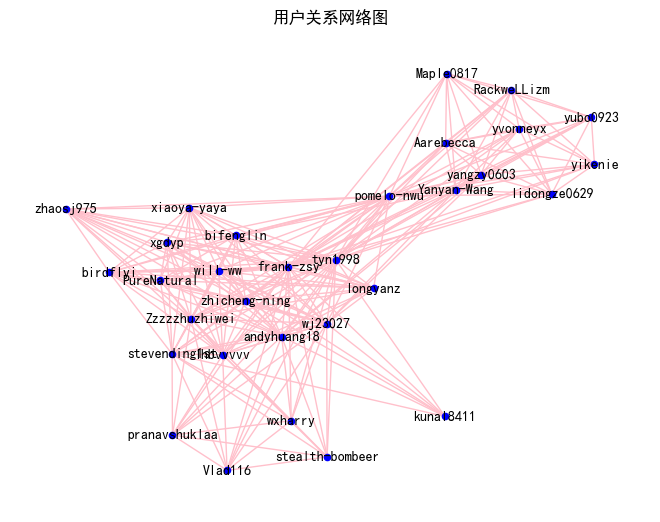

In [37]:
import json  
import networkx as nx  
import matplotlib.pyplot as plt    
import matplotlib  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file)  
nodes = data['nodes']  
edges = data['edges']  
G = nx.Graph()  
for node in nodes:  
    user_name, _ = node 
    G.add_node(user_name)  
for edge in edges:  
    user1, user2, weight = edge  
    G.add_edge(user1, user2, weight=weight)  
labels = {node: node for node in G.nodes()}  
pos = nx.spring_layout(G)  # 使用spring布局算法来计算节点位置  
nx.draw(G, pos, with_labels=True, node_size=20, node_color='blue', font_size=10, font_weight='bold', edge_color='pink')  
labels = nx.get_edge_attributes(G, 'weight')  
plt.title('用户关系网络图')  
plt.show()

b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

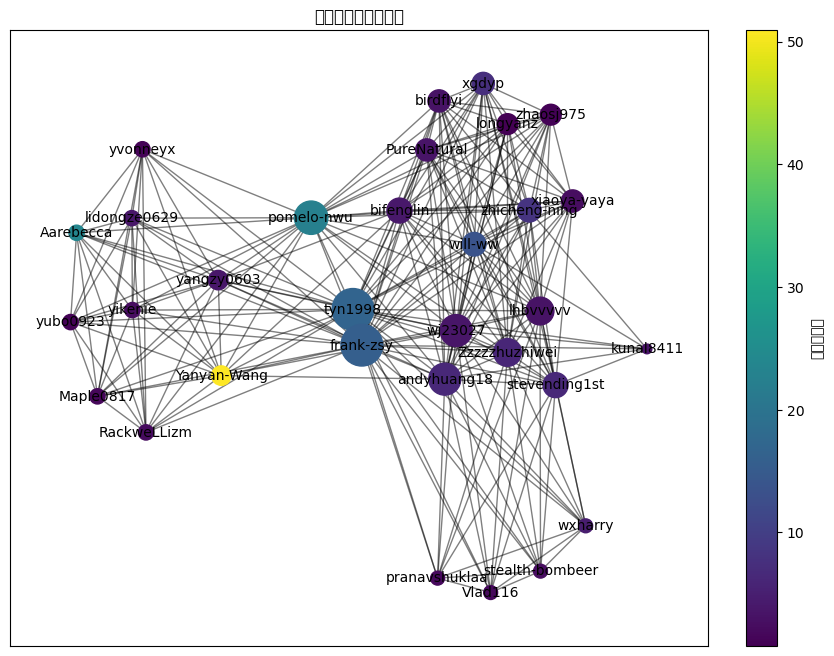

In [35]:
import json  
import networkx as nx  
import matplotlib.pyplot as plt  
import numpy as np  
with open('C:\\Users\\任雪宁\\Desktop\\hw4_data.json', 'r', encoding='utf-8') as file:  
    data = json.load(file)  
  
nodes = data['nodes']  
edges = data['edges']  
G = nx.Graph()  
for node in nodes:  
    name, influence_score = node  
    G.add_node(name, influence_score=influence_score)  
  
for edge in edges:  
    user1, user2, _ = edge  
    G.add_edge(user1, user2)  
degree_dict = dict(G.degree())   
min_score = min(node[1] for node in nodes)  
max_score = max(node[1] for node in nodes)  
norm = plt.Normalize(vmin=min_score, vmax=max_score)  
colors = plt.cm.viridis(norm([node[1] for node in nodes]).tolist()) 
node_sizes = [degree_dict[node] ** 2.0 for node in G.nodes()]
fig, ax = plt.subplots(figsize=(10, 8))  
pos = nx.spring_layout(G) 
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=colors, ax=ax)
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)  
nx.draw_networkx_labels(G, pos, font_size=10, ax=ax)  
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=norm)  
sm.set_array([])   
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)  
cbar.set_label('影响力得分')  
plt.title('社交网络影响力分析')  
plt.show()